## Project: Hepatitis Classification
### Summary:
Hepatitis C is one type of liver infection that can can lead to permanent liver damage, decreased wuality of life and shortened life expectancy. While symptoms of liver infections may be non-specific (e.g. tiredness, nausea, ...), increased values of certain enzymes in the blood stream can indicate hepatic malfunction, thus suggesting to perform more in-depth tests. The interpretation of the results is typically left to the assigned doctor, who can use standardized guidelines to help in the diagnosis.
 In this project, we investigate the possibility of employing Machine Learning classification to determine whether a given bloodtest indicates Hepatitis C in particular, and we explore the algorithm's predictive power in the case of more specialized conditions that can result from it.

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [5]:
#Initialization of dataframe - loading file into pandas dataframe
df = pd.read_csv('HepatitisCData.csv', index_col = [0])

df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


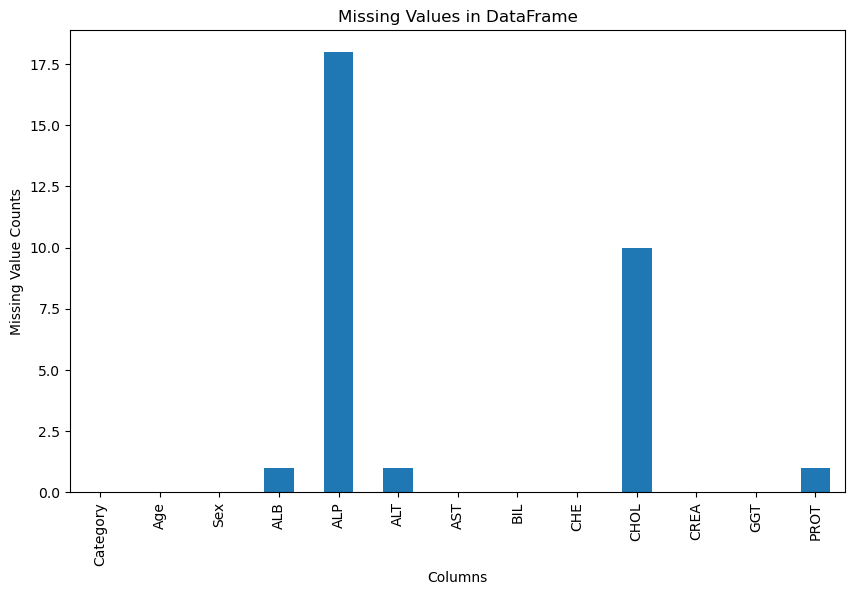

In [6]:
#Check for missing values
miss_vals = df.isnull().sum()

# Plot the missing value counts
plt.figure(figsize=(10, 6))
miss_vals.plot(kind='bar')
plt.xlabel('Columns')
plt.ylabel('Missing Value Counts')
plt.title('Missing Values in DataFrame')
plt.show()


In [7]:
#Data cleaning
    
#Turn Categories into integers. 0=donor, 1=HepC, 2=Fibrosis, 3=Cirrhosis, 0s->4=SuspectDonor 
if df['Category'].dtype == 'object':
    df.loc[df['Category'].str[:2] == '0s', 'Category'] = '44'
    df['Category'] = df['Category'].str[0]
    df['Category'] = df['Category'].astype('int')
    
#Remove rows with missing ALP and CHOL, fill the rest with 0
df.dropna(subset=['CHOL', 'ALP'], inplace=True)
df['ALB'].fillna(0, inplace=True)
df['ALT'].fillna(0, inplace=True)
df['PROT'].fillna(0, inplace=True)
    
df = df.sort_values('Category')
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
364,0,38,f,40.3,87.2,21.4,23.9,5.5,7.52,5.73,69.0,20.1,74.0
363,0,38,f,41.2,61.9,19.4,22.9,10.5,7.86,3.61,85.0,19.5,66.6
362,0,38,f,50.3,92.1,40.1,30.9,4.2,10.02,3.97,100.0,30.5,77.3
361,0,38,f,48.5,56.2,36.0,27.9,15.3,11.07,6.06,69.0,23.5,77.3


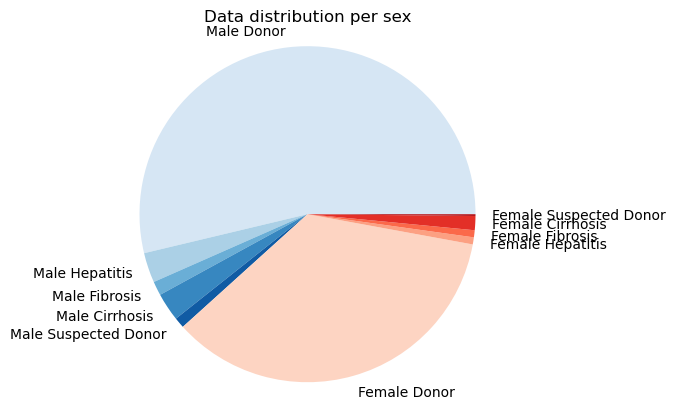

In [8]:
#Data availability per sex

#Pie charts on data distribution
tot = len(df)

#male_dat = df_male.groupby('Category').size().tolist();
male_dat = df.loc[df['Sex'] == 'm', 'Category'].sort_values().value_counts().sort_index().tolist();
female_dat = df.loc[df['Sex'] == 'f', 'Category'].sort_values().value_counts().sort_index().tolist();

pie_data = male_dat + female_dat
pie_data = [100 * dat / tot for dat in pie_data]

color_male = plt.cm.Blues([val / 6 for val in range(1,6)])
color_female = plt.cm.Reds([val / 6 for val in range(1,6)])
colors = color_male.tolist() + color_female.tolist()
labels = ['Male Donor', 'Male Hepatitis', 'Male Fibrosis', 'Male Cirrhosis', 'Male Suspected Donor', 
          'Female Donor', 'Female Hepatitis', 'Female Fibrosis', 'Female Cirrhosis', 'Female Suspected Donor']

plt.pie(pie_data, colors = colors, labels = labels)

#Figure title/axies
plt.title('Data distribution per sex')
plt.axis('equal')
plt.show()


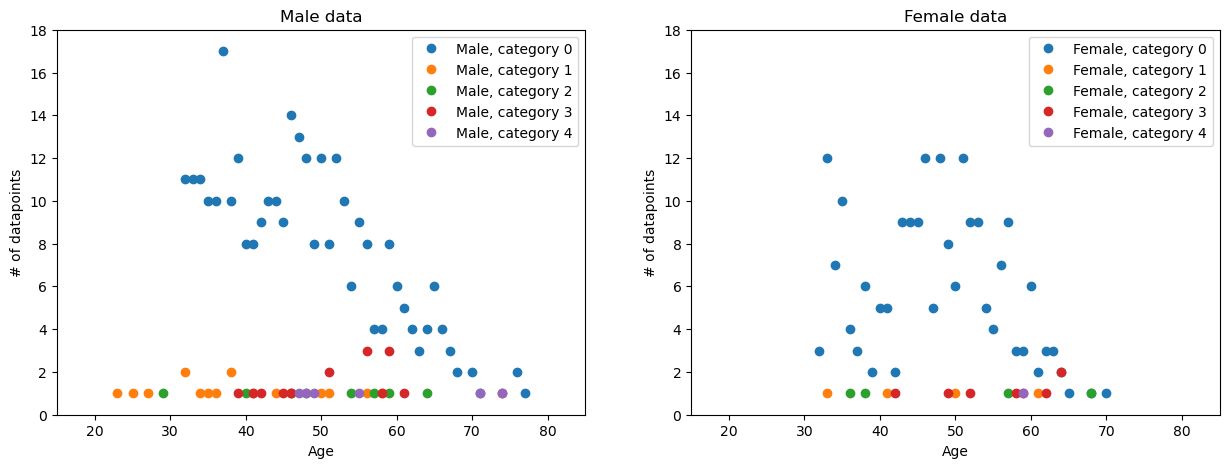

In [9]:
#Data distribution per sex and age

#Split data in male and female
df_male = df.loc[df['Sex'] == 'm', ['Category', 'Age']]
df_female = df.loc[df['Sex'] == 'f', ['Category', 'Age']]

#initialize figure with two subplots, side by side
fig, axes = plt.subplots(1, 2, figsize=(15, 5)) 

#extract data and plot it
for cat in df['Category'].unique():
    
    #Male data
    count = df_male.loc[df_male['Category'] == cat, 'Age'].value_counts().sort_index()
    age = df_male.loc[df_male['Category'] == cat, 'Age'].sort_values().unique()
    label = f'Male, category {cat}'
    axes[0].plot(age, count.values, label = label, marker='o', linestyle='')
    
    #Female data
    count = df_female.loc[df_female['Category'] == cat, 'Age'].value_counts().sort_index()
    age = df_female.loc[df_female['Category'] == cat, 'Age'].sort_values().unique()
    label = f'Female, category {cat}'
    axes[1].plot(age, count.values, label = label, marker='o', linestyle='')
    
#Figure labels
axes[0].set_xlabel('Age')
axes[0].set_ylabel('# of datapoints')
axes[0].set_title('Male data')
axes[0].set_xlim(15, 85)
axes[0].set_ylim(0, 18)
axes[0].legend()
             
axes[1].set_xlabel('Age')
axes[1].set_ylabel('# of datapoints')
axes[1].set_title('Female data')
axes[1].set_xlim(15, 85)
axes[1].set_ylim(0, 18)
axes[1].legend()

plt.show()

C:\Users\asabb\AppData\Local\Temp\ipykernel_1920\1605934910.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr();


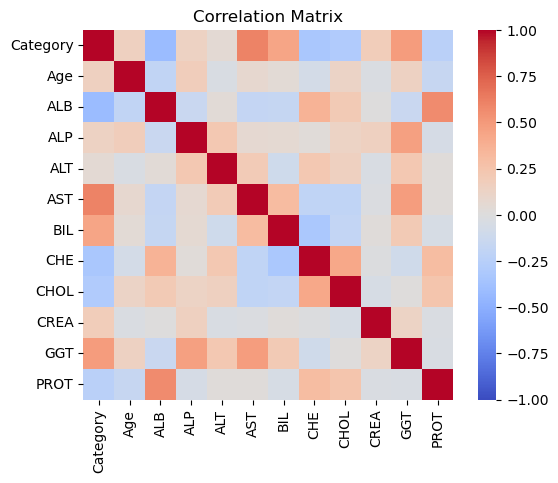

In [10]:
#Check correlation matrix to see if there are parameters in which prediction is linear
corr_matrix = df.corr();

# Create a heatmap
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', square=True, vmin = -1, vmax = 1)

# Set plot properties
plt.title('Correlation Matrix')
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Show the plot
plt.show()

#### Preliminary conclusions: 
There is considerably more data for healthy donors than for anything else -> stratified train-test split. Moreover, there is very little data per class of disease, making specific predictions unreliable -> subclasses will be merged. Additionally, there appear to not be any significant difference in distribution of healthy/diseased cases between male and female, suggesting that the two can be put together. Finally, due to the uneven sampling of age distribution, age will not be considered in the model as a predictor.


## ML model

### Approach 1: Logistic regression
To begin with, we will try to see if we can simply classify a patient as healthy or diseased (implying Hepatitis C, with any complication), based on their bloodtest. To do so, we can simply perform a logistic regression on the labeled data we have.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression

In [13]:
#Perform further data cleanup based on above considerations
df_unified = df.copy()
df_unified.loc[df_unified['Category'] > 0, 'Category'] = 1
df_unified.drop('Age', axis = 1, inplace = True)
df_unified.drop('Sex', axis = 1, inplace = True)
df_unified.head()

,Category,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
364,0,40.3,87.2,21.4,23.9,5.5,7.52,5.73,69.0,20.1,74.0
363,0,41.2,61.9,19.4,22.9,10.5,7.86,3.61,85.0,19.5,66.6
362,0,50.3,92.1,40.1,30.9,4.2,10.02,3.97,100.0,30.5,77.3
361,0,48.5,56.2,36.0,27.9,15.3,11.07,6.06,69.0,23.5,77.3


In [14]:
#Split data for training, validation and test

test_rows = df_unified.sample(n = 30, random_state = 42)
df_unified.drop(test_rows.index)

# Split between predictors and predictions
X = df_unified.drop('Category', axis=1)  # Features (predictor variables)
y = df_unified['Category']  # Target variable

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [15]:
model = LogisticRegression()
model.fit(X_train, y_train)

d:\Programming\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
# Run predictions on the validation set
y_pred = model.predict(X_test)

# Generate the classification report for the validation set
report = classification_report(y_test, y_pred)

print(report)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       105
           1       0.90      0.69      0.78        13

    accuracy                           0.96       118
   macro avg       0.93      0.84      0.88       118
weighted avg       0.96      0.96      0.96       118



In [17]:
# Run predictions on the test set
y_pred2 = model.predict(test_rows.drop('Category', axis=1))

# Print the classification report for the test set
report = classification_report(test_rows['Category'], y_pred2)
print(report)

Validation Accuracy: 0.9333333333333333
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        25
           1       1.00      0.60      0.75         5

    accuracy                           0.93        30
   macro avg       0.96      0.80      0.86        30
weighted avg       0.94      0.93      0.93        30



### Conclusions: 
Despite the high accuracy, the model is not suitable for diagnosis: the low Recall indicates that there are several instances in which ill patients would be misdiagnosed as healthy. 

## Approach 2: SVM with gridsearch
We can try to use a more robust classification method, and optimize its hyperparameters so as to maximize Recall. Later on we will also be able to use SVM to try and realize a more refined classification to predict conditions and complications.

In [18]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [19]:
#Perform further data cleanup based on above considerations
df_unified = df.copy()
df_unified.loc[df_unified['Category'] > 0, 'Category'] = 1
df_unified.drop('Age', axis = 1, inplace = True)
df_unified.drop('Sex', axis = 1, inplace = True)
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
364,0,38,f,40.3,87.2,21.4,23.9,5.5,7.52,5.73,69.0,20.1,74.0
363,0,38,f,41.2,61.9,19.4,22.9,10.5,7.86,3.61,85.0,19.5,66.6
362,0,38,f,50.3,92.1,40.1,30.9,4.2,10.02,3.97,100.0,30.5,77.3
361,0,38,f,48.5,56.2,36.0,27.9,15.3,11.07,6.06,69.0,23.5,77.3


In [20]:
#Split data for training, validation and test

# Split between predictors and rpedictions
X = df_unified.drop('Category', axis=1)  # Features (predictor variables)
y = df_unified['Category']  # Target variable

# Split the data into train and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=2, stratify=y_train_val)

In [21]:
# Define the hyperparameters and their potential values
param_grid = {
    'C': [0.01, 0.1, 0.5],
    'kernel': ['linear'],
    'gamma': [0.01, 0.05, 0.1]
}

# Create an instance of the SVM classifier
svm = SVC()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, scoring='recall_macro')

# Fit the GridSearchCV object to your training data
grid_search.fit(X_train_val, y_train_val)

# Access the best hyperparameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Use the best estimator to make predictions on the validation set
y_pred = best_model.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)

print(report)
print (best_params)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       105
           1       1.00      0.85      0.92        13

    accuracy                           0.98       118
   macro avg       0.99      0.92      0.95       118
weighted avg       0.98      0.98      0.98       118

{'C': 0.01, 'gamma': 0.01, 'kernel': 'linear'}


In [22]:
# Use the best estimator to make predictions on the test set
y_pred = best_model.predict(X_val)

# Generate the classification report
report = classification_report(y_val, y_pred)

print(report)
print (best_params)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        85
           1       1.00      0.80      0.89        10

    accuracy                           0.98        95
   macro avg       0.99      0.90      0.94        95
weighted avg       0.98      0.98      0.98        95

{'C': 0.01, 'gamma': 0.01, 'kernel': 'linear'}


### Conclusions:
Using SVM with grid-search optimization provided a considerably higher Recall, increasing the reliability of the model. The model is not ready for clinical usage (20% of the diseased patients still go unnoticed!), but further improvements would require a more extensive training dataset.

## Approach 3: SVM with optimization for multiclass classification
For curiosity, let's see how the model would perform when trying to classify whether a patient has Hepatitis C, fibrosis or chirrosis. The additional challenge here comes from the very low amount of data available for each condition, once they're not aggregated anymore.

In [23]:
#Perform further data cleanup based on above considerations
df_unified = df.copy()
df_unified.drop('Age', axis = 1, inplace = True)
df_unified.drop('Sex', axis = 1, inplace = True)
df.head()

,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
1,0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
364,0,38,f,40.3,87.2,21.4,23.9,5.5,7.52,5.73,69.0,20.1,74.0
363,0,38,f,41.2,61.9,19.4,22.9,10.5,7.86,3.61,85.0,19.5,66.6
362,0,38,f,50.3,92.1,40.1,30.9,4.2,10.02,3.97,100.0,30.5,77.3
361,0,38,f,48.5,56.2,36.0,27.9,15.3,11.07,6.06,69.0,23.5,77.3


In [24]:
#Split data for training, validation and test

# Split between predictors and rpedictions
X = df_unified.drop('Category', axis=1)  # Features (predictor variables)
y = df_unified['Category']  # Target variable

# Split the data into train and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=2, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.2, random_state=2, stratify=y_train_val)

In [25]:
# Define the hyperparameters and their potential values
param_grid = {
    'C': [0.01, 0.1, 0.5],
    'kernel': ['linear'],
    'gamma': [0.01, 0.05, 0.1]
}

# Create an instance of the SVM classifier
svm = SVC()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, scoring='recall_macro')

# Fit the GridSearchCV object to your training data
grid_search.fit(X_train_val, y_train_val)

# Access the best hyperparameters and best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Use the best estimator to make predictions on the validation set
y_pred = best_model.predict(X_test)

# Generate the classification report
report = classification_report(y_test, y_pred)

print(report)
print (best_params)

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       105
           1       0.25      0.25      0.25         4
           2       0.00      0.00      0.00         3
           3       0.71      1.00      0.83         5
           4       1.00      1.00      1.00         1

    accuracy                           0.95       118
   macro avg       0.59      0.65      0.62       118
weighted avg       0.93      0.95      0.94       118

{'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}


d:\Programming\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Programming\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
d:\Programming\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Conclusions:
By looking at the Recall values in the validation case, we can already see that the algorithm struggles to learn the difference between the various conditions.